# PHASE 3: ???
- TODO: fill in with Prof's description

# PLANNING

DATA PREP
- stratified split 

ML METHODS
- Binary classification
- Multiclass classification
- KNN?

EVALUATION
- Confusion Matrix: TP, FP, TN, FN, FP
  - Then F1 and stuff...????

SOURCE
- https://www.learndatasci.com/glossary/binary-classification/ 

# IMPORTS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#* TODO - it's only 3 seconds.. it should be fine to import all of it right?
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# SETUP

### Import DF 
- From the CSV file I created in my Phase 2 (EDA) notebook

In [3]:
# Get current file path
current_path = os.getcwd()
parent_file_path = os.path.dirname(current_path)

# Construct desired file path
file_path = f'{parent_file_path}\\output\\oasis_cross-sectional_filtered.csv'
print('file_path =', file_path)

#* TODO Rename column names??
#* TODO -- set datatypes?
# Read CSV into Pandas, use the file path defined above, set row 0 as the header, and column 0 as the index
df = pd.read_csv(file_path, 
                 header = 0, 
                 index_col = 0)
df.head()

file_path = c:\Users\GlaDOS\Documents\GitHub\eugene_data606\output\oasis_cross-sectional_filtered.csv


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


### Rename columns
- Elaborate on the full names according to the metadata descriptions provided

In [4]:
# For reference
df.columns

Index(['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], dtype='object')

In [5]:
rename_dict = {'M/F'    : 'Gender', 
               'Educ'   : 'Education',
               'SES'    : 'Socioeconomic Status',
               'MMSE'   : 'Mini-Mental State Examination',
               'CDR'    : 'Clinical Dementia Rating',
               'eTIV'   : 'Estimated total intracranial volume (mm^3)',
               'nWBV'   : 'Normalized whole brain volume',
               'ASF'    : 'Atlas scaling factor'
                }

# Rename columns based on provided dictionary
df = df.rename(columns = rename_dict)

# display the updated dataframe
df

,Gender,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...
431,M,20,NaN,NaN,NaN,NaN,1469,0.847,1.195
432,M,22,NaN,NaN,NaN,NaN,1684,0.790,1.042
433,M,22,NaN,NaN,NaN,NaN,1580,0.856,1.111
434,F,20,NaN,NaN,NaN,NaN,1262,0.861,1.390


# PREPROCESSING

Need to replace the Gender column with dummies

In [6]:
# CHECK
print(f"Gender column has {df['Gender'].nunique()} unique values")
print(f'I expect 2 (for M/F data)')

Gender column has 2 unique values
I expect 2 (for M/F data)


Replace the DF with the dummy version
- 0 = female
- 1 = male

NOTES:
- The `Gender` column has been renamed to `Gender_M` and moved to the right side of DF
- `drop_first` --> removes the reference column generated by the `get_dummies` command

In [7]:
df = pd.get_dummies(
    df, 
    columns = ['Gender'], 
    drop_first = True)
df

,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor,Gender_M
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,0
3,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,1
4,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,1
...,...,...,...,...,...,...,...,...,...
431,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,1
432,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,1
433,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,1
434,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,0


Q) Should I impute for my target column (CDR)? 

A) That doesn't sound like a good idea...

In [8]:
# CHECK how many unknowns in CDR
unknown_count = df['Clinical Dementia Rating'].isna().sum()
print(f'There are {unknown_count} unknowns in the CDR column')
print(f'Total length of CDR = {len(df)}')
print(f'Making that {int(unknown_count/len(df) * 100)}% of the CDR column missing')

There are 201 unknowns in the CDR column
Total length of CDR = 436
Making that 46% of the CDR column missing


Move the target column (CDR) to the end for simpler processing later 

In [9]:
# Define the column I want to move
column_name = 'Clinical Dementia Rating'

# Removes this column from the original DF
last_column = df.pop(column_name)

# Insert CDR column back into the DF, but at the end
df.insert(len(df.columns), column_name, last_column)

# CHECK - is CDR last?
df.head(1)

,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor,Gender_M,Clinical Dementia Rating
0,74,2.0,3.0,29.0,1344,0.743,1.306,0,0.0


### Drop missing rows in target column

In [10]:
# Drop rows with missing values in target column (CDR)
df.dropna(subset = ['Clinical Dementia Rating'], inplace=True)
df

,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor,Gender_M,Clinical Dementia Rating
0,74,2.0,3.0,29.0,1344,0.743,1.306,0,0.0
1,55,4.0,1.0,29.0,1147,0.810,1.531,0,0.0
2,73,4.0,3.0,27.0,1454,0.708,1.207,0,0.5
8,74,5.0,2.0,30.0,1636,0.689,1.073,1,0.0
9,52,3.0,2.0,30.0,1321,0.827,1.329,0,0.0
...,...,...,...,...,...,...,...,...,...
411,70,1.0,4.0,29.0,1295,0.748,1.355,0,0.5
412,73,3.0,2.0,23.0,1536,0.730,1.142,0,0.5
413,61,2.0,4.0,28.0,1354,0.825,1.297,0,0.0
414,61,5.0,2.0,30.0,1637,0.780,1.072,1,0.0


### Split target column (CDR) into binary groups of non-demented or demented patients

In [11]:
# Set bin borders for integer to categorical conversion
bins = [0, 0.1, np.inf]

#* TODO - name this as the binary DF?
# Split the CDR into 2 groups: demented and non-demented
df['Clinical Dementia Rating'] = df['Clinical Dementia Rating'].apply(
    lambda x: 'non-demented' if x == 0.0 else (
        'demented' if x == 0.5 else(
            'demented' if x == 1 else(
                'demented' if x == 2 else 'unknown'))))

# CHECK - need to make sure that the lambda function split up CDR correctly
print("# of unique values in the CDR column =\n", df['Clinical Dementia Rating'].nunique(), '== 2?')
df.head(10)

# of unique values in the CDR column =
 2 == 2?


,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor,Gender_M,Clinical Dementia Rating
0,74,2.0,3.0,29.0,1344,0.743,1.306,0,non-demented
1,55,4.0,1.0,29.0,1147,0.810,1.531,0,non-demented
2,73,4.0,3.0,27.0,1454,0.708,1.207,0,demented
8,74,5.0,2.0,30.0,1636,0.689,1.073,1,non-demented
9,52,3.0,2.0,30.0,1321,0.827,1.329,0,non-demented
11,81,5.0,2.0,30.0,1664,0.679,1.055,0,non-demented
13,76,2.0,NaN,28.0,1738,0.719,1.010,1,demented
14,82,2.0,4.0,27.0,1477,0.739,1.188,1,demented
16,39,3.0,4.0,28.0,1636,0.813,1.073,1,non-demented
17,89,5.0,1.0,30.0,1536,0.715,1.142,0,non-demented


# [1] DEFINE DATA AND TARGET VARIABLES

First, get the column names as a list

Then, pick the data columns and the target columns to use

In [12]:
# All columns besides the target column (CDR) will be used as the explanatory data columns
data_column_list = df.columns[df.columns != 'Clinical Dementia Rating'].tolist()
target_column_list = ['Clinical Dementia Rating']

# CHECK
print('type(data_column_list) =', type(data_column_list))
print('data_column_list =', data_column_list )
print('target_column_list =', target_column_list)

type(data_column_list) = <class 'list'>
data_column_list = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
target_column_list = ['Clinical Dementia Rating']


Split the DF up based on the predefined lists for data and target columns

In [13]:
X = df[data_column_list]
y = df[target_column_list]

# CHECK
print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (235, 8)
y.shape = (235, 1)


# [2] STRATIFIED TRAIN/TEST SPLIT
- X = 8 data columns 
- y = 1 target column
- test_size = 20% for testing (model evaluation) later
- stratify = keep the ratios of outcomes in the target column the same between training/testing groups
- random_state = 0 --> for reproducibility

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.20,
    stratify = y,
    random_state = 0
)

# Collect all resulting datasets into 1 dictionary for simpler iterating later
all_dfs_dict = {
    'X_test'    : X_test,
    'X_train'   : X_train,
    'y_test'    : y_test,
    'y_train'   : y_train
}

# Loop through the dictionary and print name: shape
for key, value in all_dfs_dict.items():
    print(f"{key}.shape: {value.shape}")

X_test.shape: (47, 8)
X_train.shape: (188, 8)
y_test.shape: (47, 1)
y_train.shape: (188, 1)


# [3] IMPUTE + NORMALIZE DATA

Q) What order should I do this in?

A) Prolly impute 1st, see: https://datascience.stackexchange.com/questions/53138/which-comes-first-multiple-imputation-splitting-into-train-test-or-standardiz

### Impute missing data

### CHECK

Q) How much of a difference would it be if I removed all rows with any nulls?

A) It will cut down the dataset around half (50%) according to my EDA notebook

### TODO
- maybe I should run both methods to check anyway?

### Impute missing data in rows
- IMPORTANT!!! --> run imputation AFTER train/test splitting

TODO:
- Impute missing data using median since most of these started as multi-class labels??? can't used mean for them anyway, and the distribution is very skewed according to my EDA notebook

In [15]:
# CHECK for nulls in each DF

# Iterate thru every DF
for key, value in all_dfs_dict.items():
    #print(f'{value}')
    
    # Save a list of numerical (float/int) type columns
    numerical_list = value.select_dtypes(include = 'number').columns.tolist()
    print(f'numerical list of {key} =', numerical_list)
    
    # Sum up nulls in each DF
    nulls_before = value.isnull().sum()
    #print(nulls_before)
    
    # Iterate thru every row of resulting nulls counts
    for row in nulls_before:
        
        # CASE #1: are any of the null counts > 0?
        if row > 0:
            
            # Print name of DF and name of column
            print(f'{key} has nulls in:')
            print(nulls_before[nulls_before > 0])
            
            # CHECK numerical list???
        
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

numerical list of X_test = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
X_test has nulls in:
Socioeconomic Status    7
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
numerical list of X_train = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
X_train has nulls in:
Socioeconomic Status    12
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
numerical list of y_test = []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
numerical list of y_train = []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [16]:
# Impute missing numerical values for each value

for key, value in all_dfs_dict.items():
    
    # CHECK - before 
    nulls_before = value.isnull().sum()

    # Save a list of numerical (float/int) type columns
    numerical_list = value.select_dtypes(include = 'number').columns.tolist()
    print(f'{key} numerical list =', numerical_list)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    # Impute median values in every numerical column
    for column in numerical_list:
        median = value[column].median()
        value[column].fillna(median, inplace = True)
        
    # CHECK - after
    nulls_after = value.isnull().sum()

    #* TODO - could try to have it check before and after 
    #! ERROR - ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()
    
    # if nulls_before == nulls_after:
    #     continue
    # else:
        
    # Print the before and after sum of null values
    print(f'{key} nulls_before =\n', nulls_before)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'{key} nulls_after =\n', nulls_after)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

X_test numerical list = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
X_test nulls_before =
 Age                                           0
Education                                     0
Socioeconomic Status                          7
Mini-Mental State Examination                 0
Estimated total intracranial volume (mm^3)    0
Normalized whole brain volume                 0
Atlas scaling factor                          0
Gender_M                                      0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
X_test nulls_after =
 Age                                           0
Education                                     0
Socioeconomic Status                          0
Mini-Mental State Examination                 0
Estimated total intracranial volume (mm^3)    0
N

### Normalize data

Q) When should I normalize?

A) When:
- distribution is not normal --> yes
- magnitudes are very different --> yes
- test and find out before/after

### WARNING!
- exclude these columns from min/max scaling:
  - target (CDR)
  - dummies (Gender_M)
- You should only scale CONTINUOUS # col's
  - Mine mostly AREN'T continuous...
  - They are discrete groups, really multi-class labels


Q) Which are continuous numeric columns?

A) These columns are:
- Age
- MMSE???
- eTIV???
- nWBV???
- ASF???

Q) Which are discrete numeric columns?

A) These are discrete:
- Educ
- SES
- Gender???

Maybe I should use ColumnTransformer instead:
- see: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [17]:
# #? Q) Should I be excluding the target column?
# #? Q) Should I use Normalizer or MinMaxScaler?

# # Iterate thru the all DFs in the dictionary
# for key, value in all_dfs_dict.items():
    
#     # Apply min/max scaling to each DF
#     # min_max_scaler = MinMaxScaler()
#     normalizedX = MinMaxScaler().fit_transform(value)

In [18]:
# # Assuming your DataFrame is named 'df'
# numeric_columns = ['num_col1', 'num_col2', 'num_col3']
# min_max_scaler = MinMaxScaler()
# df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

In [19]:
# Let's try applying the Standard Scaler
# IMPORTANT!! -- do the train/test datasets SEPARATELY!!

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)   

# [4] FIT DATA
- SOURCE: https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/#:~:text=Training%20the%20Logistic%20Regression%20Model

### Convert both the y columns into a 1D array
- Necessary to fix training error

In [20]:
# CHECK - y column dimensions
print('type(y_train) =', type(y_train))
print('type(y_test) =', type(y_test))

type(y_train) = <class 'pandas.core.frame.DataFrame'>
type(y_test) = <class 'pandas.core.frame.DataFrame'>


In [21]:
# Convert the y column into a 1D array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# CHECK - conversion results
print('type(y_test) =', type(y_test))
print('type(y_train) =', type(y_train))

type(y_test) = <class 'numpy.ndarray'>
type(y_train) = <class 'numpy.ndarray'>


In [22]:
# Create an instance of Logistic Regression
model = LogisticRegression()

# Train the model using my training datasets and fitting to the Logistic Regression model

model.fit(X_train, y_train)

LogisticRegression()

#! ERROR

c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)
  
c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
    
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    
  n_iter_i = _check_optimize_result(

# [5] PREDICTIONS

In [23]:
# Check prediction accuracy against the testing data
predictions = model.predict(X_test)

### Setup a Confusion Matrix to evaluate prediction accuracy

In [24]:
cm = confusion_matrix(y_test, predictions)

# Save the T/F Positives/Negatives into variables and print them
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

# Save the resulting variables to a dictionary
all_TF_pos_neg_results = {
    'True Negative (TN)'    : TN, 
    'False Positive (FP)'   : FP, 
    'False Negative (FN)'   : FN, 
    'True Positive (TP)'    : TP
}

# Print all results
for key, value in all_TF_pos_neg_results.items():
    print(f'{key} = {value}')

True Negative (TN) = 14
False Positive (FP) = 6
False Negative (FN) = 4
True Positive (TP) = 23


### Calculate accuracy

In [25]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

# Print conversion to a percentage, drop extra digits beyond the decimal point
print(f'Accuracy of the binary classifier = {accuracy * 100:.0f}%')

Accuracy of the binary classifier = 79%


### Repeat this for other binary classifiers

In [26]:
# Save multiple models into a dictionary
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# CHECK
print('models =\n', models)

models =
 {'Logistic Regression': LogisticRegression(), 'Support Vector Machines': LinearSVC(), 'Decision Trees': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'Naive Bayes': GaussianNB(), 'K-Nearest Neighbor': KNeighborsClassifier()}


### Run accuracy, precision, and recall stats on all models

- must set the `pos_label` 

In [27]:
#* TODO - add F1 score

# Setup empty dictionaries to save the results to later
accuracy, precision, recall = {}, {}, {}

# Iterate thru every key (model) stored in the models dictionary
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key]   = accuracy_score(predictions, y_test)
    precision[key]  = precision_score(predictions, y_test, pos_label = 'demented')
    recall[key]     = recall_score(predictions, y_test, pos_label = 'demented')

### Output all the stats in a table

In [32]:
#* TODO - convert the values into 100%?

# Create a DF based on the accuracy, precision and recall dictionaries
df_model = pd.DataFrame(
    index = models.keys(), 
    columns = ['Accuracy', 'Precision', 'Recall'])

# Populate the columns with the results of each stat
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

# Print DF
#df_model

In [31]:
#* TODO - sort the order by...???
#* TODO - maybe this would be good for Plotly express or Streamlit for interaction

# Sort by highest accuracy
df_model_sort_by_accuracy = df_model.sort_values(
    by = 'Accuracy', 
    ascending = False)
df_model_sort_by_accuracy

,Accuracy,Precision,Recall
Decision Trees,0.829787,0.75,0.833333
Logistic Regression,0.787234,0.70,0.777778
Random Forest,0.765957,0.60,0.800000
Naive Bayes,0.765957,0.75,0.714286
Support Vector Machines,0.744681,0.60,0.750000
K-Nearest Neighbor,0.680851,0.55,0.647059


# [DATA VIZ] Bar chart

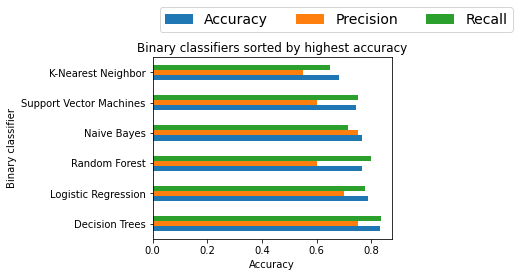

In [51]:
#* TODO - maybe this would be good for Plotly express or Streamlit for interaction

# Set to horizontal bar chart
ax = df_model_sort_by_accuracy.plot.barh()

# Create legend
ax.legend(
    ncol = len(models.keys()), 
    bbox_to_anchor = (0, 1.1), 
    loc = 'lower left', 
    prop = {'size': 14}
)

# Add labels
plt.title('Binary classifiers sorted by highest accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Binary classifier')
plt.tight_layout()

# SAVE FOR LATER ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [30]:
# # Split the CDR into multiclass groups denoting the severity of the dementia
# df['CDR'] = df['CDR'].apply(
#     lambda x: 'non-demented' if x == 0.0 else (
#         'very mild dementia' if x == 0.5 else(
#             'mild dementia' if x == 1 else(
#                 'moderate dementia' if x == 2 else 'unknown'))))